In [3]:
import pandas as pd

## Modifying Data

### Cleansing Raw Indonesian Rice Price Data to form per Year Dataset

In [4]:
def cleansing(data_num: int):
    data = pd.read_excel('raw-data/Rata-Rata Harga Beras Bulanan di Tingkat Penggilingan Menurut Kualitas (' + str(data_num) + ').xlsx')
    year = data.iat[0, 1]
    data = data.iloc[2:5, 1:13]
    data.columns = [str(i) + '-' + year for i in range(1, 13)]
    data = data.T
    data.columns = ['premium', 'medium', 'bad']
    data = data.replace('-','0')
    data.to_csv('clean-data/rice_quality_indo_' + year + '.csv')

In [49]:
for i in range(1, 11):
    cleansing(i)

### Create Dataset with a Variety Range of the Years

In [5]:
def concatByYear(from_year: int, to_year: int):
    listData = []

    for i in range(from_year, to_year+1):
        listData.append(pd.read_csv('clean-data/rice_quality_indo_' + str(i) + '.csv', index_col = 0))
    
    data = pd.concat(listData)
    data.to_csv('clean-data/rice_quality_indo_' + str(from_year) + '-' + str(to_year) + '.csv')
    return data.head(), data.tail()

In [10]:
concatByYear(2017,2019)

(        premium   medium      bad
 1-2017  9431.37  9099.52  8669.30
 2-2017  9408.39  9047.57  8583.76
 3-2017  9388.53  8705.43  8339.21
 4-2017  9324.60  8653.80  8306.48
 5-2017  9436.19  8790.17  8374.33,
          premium   medium      bad
 8-2019   9530.00  9224.00  9048.00
 9-2019   9594.39  9301.08  9140.60
 10-2019  9659.17  9433.88  9241.92
 11-2019  9742.16  9522.01  9244.95
 12-2019  9838.26  9565.59  9252.55)

## Visualizing Data

In [16]:
def viewChart(from_year: int, to_year: int = 0):
    year = str(from_year)
    if to_year != 0:
        year = str(from_year) + '-' + str(to_year)
    try:
        data = pd.read_csv('clean-data/rice_quality_indo_' + year + '.csv', index_col = 0)
    except:
        concatByYear(from_year, to_year)
        data = pd.read_csv('clean-data/rice_quality_indo_' + year + '.csv', index_col = 0)
    return data.plot()


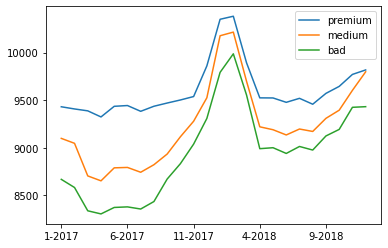

In [19]:
viewChart(2017,2018)